In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G=9.81

def Position(v0, t):
    return v0*t + .5*-G*t**2

def MaxHeight(v0, h):
    return v0**2 / (2*G) + h

def LaunchV(h, hmax):
    return np.sqrt((hmax-h)*(2*G))

def TimeToHeight(initial_height, target_height, initial_velocity):
    s = target_height - initial_height  # Displacement towards the target height

    # Coefficients for the quadratic equation
    a = -0.5 * G  # Negative because gravity opposes the initial velocity
    b = initial_velocity
    c = -s

    # Using the quadratic formula to find t
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return "The object does not reach the target height."
    elif discriminant == 0:
        # One solution
        t = -b / (2*a)
        return [t] if t >= 0 else "The object does not reach the target height."
    else:
        # Two solutions for time, corresponding to ascent and descent
        t1 = (-b + np.sqrt(discriminant)) / (2*a)
        t2 = (-b - np.sqrt(discriminant)) / (2*a)
        times = [t for t in [t1, t2] if t >= 0]
        return times if times else "The object does not reach the target height."

def TimeToMaxHeight(v0):
    return v0/G


In [5]:
# extra settings
mens=2.43
womens=2.24
mixed=2.35 # ??? no fucking clue
antenna=.8

nets={'Men':mens, 'Women':womens }

avg_setter_height=1.7
spike_tolerance=.2

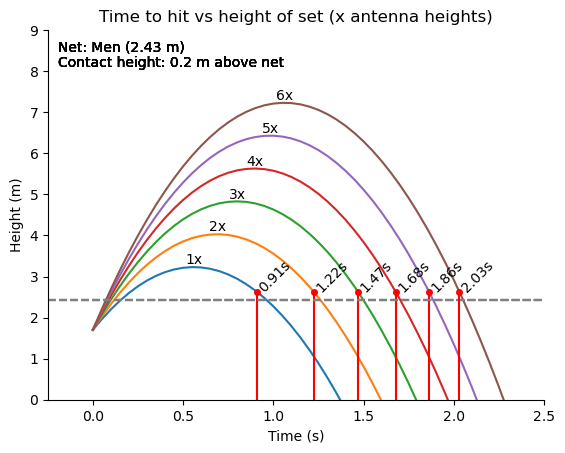

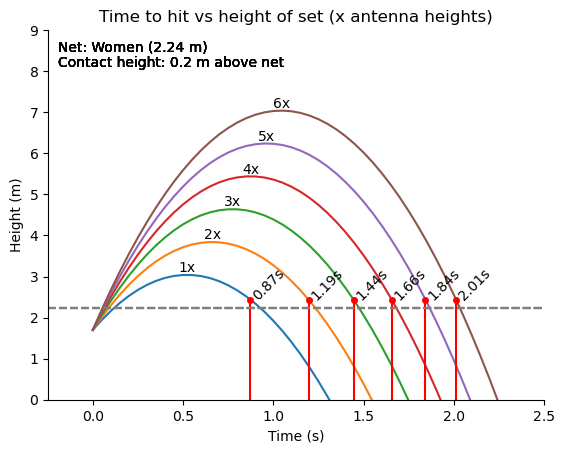

In [7]:
for label, net_height in nets.items():
    f, ax=plt.subplots()

    for n in np.arange(1,7):
        target_set_height=n*antenna
        start_height=avg_setter_height
        v0=LaunchV(start_height, target_set_height+net_height)
        max_height=MaxHeight(v0, start_height)
        hitting_height=net_height+spike_tolerance
        time_to_hit=TimeToHeight(start_height, hitting_height, v0)[-1]
        time_to_max_height=TimeToMaxHeight(v0)

        x=np.arange(0,5,.05)
        y=[Position(v0, t)+start_height for t in x]



        ax.plot(x,y)
        ax.axhline(net_height, linestyle='--', c='grey')
        ax.plot([time_to_hit, time_to_hit], [0, hitting_height], c='red')
        ax.plot([time_to_hit], [hitting_height], marker='o', c='red', markersize=4)
        ax.text(time_to_hit, hitting_height, f'{time_to_hit:.2f}s', rotation=45)
        ax.text(time_to_max_height, max_height, f'{n}x', ha='center', va='bottom')
        ax.set_ylim(0, 9)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Height (m)')
        ax.set_title('Time to hit vs height of set (x antenna heights)')
        extra_text=f'Net: {label} ({net_height:.2f} m)\nContact height: {spike_tolerance:.1f} m above net'
        ax.text(.02,.9,extra_text,transform=ax.transAxes)
        # Hide top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    ax.set_xlim(None, 2.5)

    f.savefig(f'{label}_spike_time_{spike_tolerance:.1f}m.png')